In [1]:
import pandas as pd
import numpy as np
from sklearn import linear_model, metrics
from scipy import stats
import matplotlib.pyplot as plt
df = pd.read_csv('trainingset.csv')
df.head()
dft = pd.read_csv('testset.csv')
df_com = df.append(dft)
df_com.shape

(61, 6)

In [2]:
# Case 1, training for azimuth with obs values
X1 = np.array(df_com.obs_az)
X2 = -1.0/np.cos(np.radians(list(df_com['obs_alt'])))
X3 = -1.0*np.tan(np.radians(list(df_com['obs_alt'])))
X4 = np.cos(np.radians(list(df_com['obs_az']))) * np.tan(np.radians(list(df_com['obs_alt'])))
X5 = np.sin(np.radians(list(df_com['obs_az']))) * np.tan(np.radians(list(df_com['obs_alt'])))
#X5 = np.cos(2.0*np.radians(list(df['obs_az'])))
X = np.column_stack([X1, X2, X3, X4, X5])
#X = X.T
print(X.shape)

(61, 5)


In [3]:
y = np.array(df_com.catalogue_az)
regr = linear_model.LinearRegression()
regr.fit(X, y)
y_predicted_training = regr.predict(X)
regr.intercept_ * 3600

-2895.9900265557394

In [4]:
# Calculate basic stats
def get_stats(X, y, dataframe, axis=0):
    regr = linear_model.LinearRegression()
    regr.fit(X, y)
    y_predicted = regr.predict(X)
    n = X.shape[0]
    p = X.shape[1]
    MSE_y_train = (np.sum(np.square(y - y_predicted)) / (n - p - 1) )
    RSE_y_train = np.sqrt(MSE_y_train)
    R2_y_train = regr.score(X,y)
    MSM_y_train = (np.sum(np.square(y_predicted - np.mean(y))) / (p) )
    F_statistic_y_train = MSM_y_train / MSE_y_train
    adj_R2 = 1.0 - (1.0 - R2_y_train)*(n-1)/(n-p-1)

    #RSS = np.sum(np.square(y - y_predicted_training))
    #TSS = np.sum(np.square(y - np.mean(y)))
    #print("TSS is : ", TSS)
    #f_stat = ((TSS-RSS)/5)/(RSS/(41-5-1))
    print("RSE is :", RSE_y_train)
    print("R2 score is :", R2_y_train)
    print("Adjusted R2 score is :", adj_R2)
    print("F-statistic is :",F_statistic_y_train)

    if not axis:
        h_ms_train = np.mean(np.square((y - y_predicted)*np.cos(dataframe.obs_alt)))
        h_rms_train = np.sqrt(h_ms_train)
        print("horizontal rms error in arcsec ", h_rms_train*3600)
    else:
        v_ms_train = np.mean(np.square((y - y_predicted)))
        v_rms_train = np.sqrt(v_ms_train)
        print("vertical rms error in arcsec ", v_rms_train*3600)
    
    print("coefficients are ", 3600*regr.coef_)
    return y_predicted

_ = get_stats(X, y, df_com)

RSE is : 0.000753854061127
R2 score is : 0.99999999995
Adjusted R2 score is : 0.999999999946
F-statistic is : 222170697184.0
horizontal rms error in arcsec  1.52998258878
coefficients are  [ 3599.98679929    50.66002278   -23.50174756   -25.87441276    48.15737231]


In [5]:
3600*regr.coef_

array([ 3599.98679929,    50.66002278,   -23.50174756,   -25.87441276,
          48.15737231])

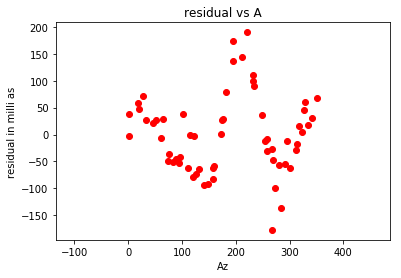

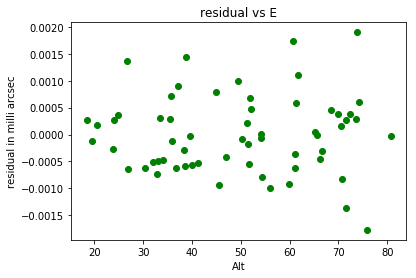

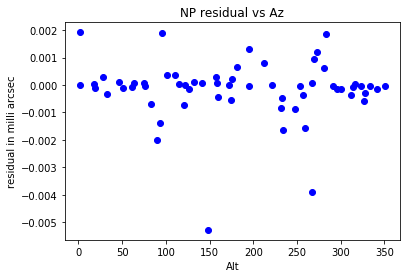

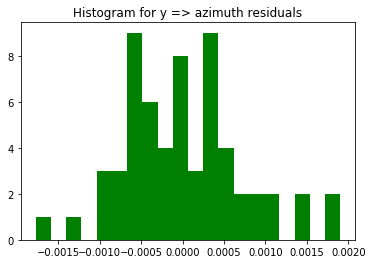

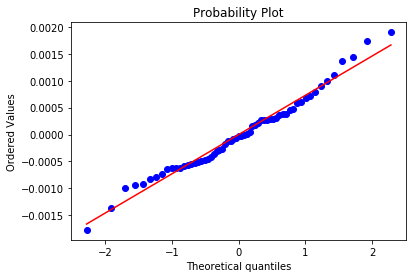

In [6]:
# residual plots at this stage
plt.plot(df_com.obs_az, (y-y_predicted_training)*100000, 'ro')
plt.axis('equal')
plt.title('residual vs A')
plt.xlabel('Az')
plt.ylabel('residual in milli as')
plt.show()

plt.plot(df_com.obs_alt, (y-y_predicted_training), 'go')
#plt.axis('equal')
plt.title('residual vs E')
plt.xlabel('Alt')
plt.ylabel('residual in milli arcsec')
plt.show()

plt.plot(df_com.obs_az, ((y-y_predicted_training)/np.tan(df_com.obs_alt)), 'bo')
#plt.axis('equal')
plt.title('NP residual vs Az')
plt.xlabel('Alt')
plt.ylabel('residual in milli arcsec')
plt.show()

fig = plt.figure()
ax = fig.add_subplot(111)
dist_tuple = ax.hist((y - y_predicted_training), bins=20, color='green')
#ax.set_xlim([-10, 10])
#ax.set_ylim([0, 10])
ax.set_title('Histogram for y => azimuth residuals')
#ax.set_aspect('equal', adjustable='box')
plt.show()

stats.probplot(y - y_predicted_training, dist='norm', plot=plt.figure().add_subplot(111))
#plt.axis('equal')
plt.show()

In [7]:
# looks like some quadratic variation in azimuth
#X6 = np.cos(np.radians(29.361232))*np.sin(2.0*np.radians(list(df['obs_az']))) / np.cos(np.radians(list(df['obs_alt'])))
X6 = np.cos(2.0*np.radians(list(df_com['obs_az'])))
X = np.column_stack([X1, X2, X3, X4, X5, X6])
y_predicted_training = get_stats(X, y, df_com)


RSE is : 0.000670061904571
R2 score is : 0.999999999962
Adjusted R2 score is : 0.999999999957
F-statistic is : 234342055267.0
horizontal rms error in arcsec  1.3248361056
coefficients are  [  3.59998829e+03   5.10285582e+01  -2.38927148e+01  -2.59575476e+01
   4.82080931e+01   1.71915966e+00]


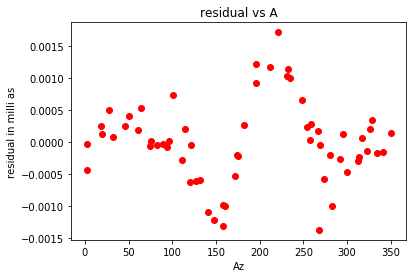

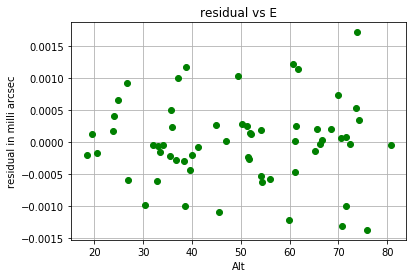

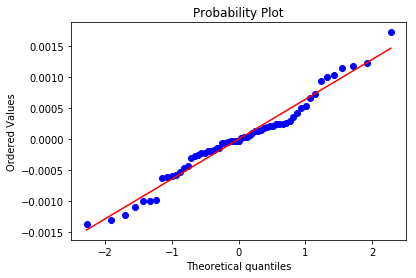

In [8]:
# residual plots at this stage
plt.plot(df_com.obs_az, (y-y_predicted_training), 'ro')
#plt.axis('equal')
plt.title('residual vs A')
plt.xlabel('Az')
plt.ylabel('residual in milli as')
plt.show()

plt.plot(df_com.obs_alt, (y-y_predicted_training), 'go')
#plt.axis('equal')
plt.title('residual vs E')
plt.xlabel('Alt')
plt.ylabel('residual in milli arcsec')
plt.grid()
plt.show()

stats.probplot(y - y_predicted_training, dist='norm', plot=plt.figure().add_subplot(111))
#plt.axis('equal')
plt.show()

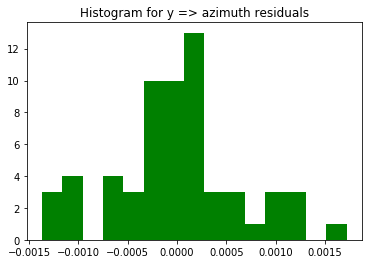

In [9]:
fig = plt.figure()
ax = fig.add_subplot(111)
dist_tuple = ax.hist((y - y_predicted_training), bins=15, color='green')
#ax.set_xlim([-10, 10])
#ax.set_ylim([0, 10])
ax.set_title('Histogram for y => azimuth residuals')
#ax.set_aspect('equal', adjustable='box')
plt.show()

RSE is : 0.000296290964669
R2 score is : 0.999999999993
Adjusted R2 score is : 0.999999999992
F-statistic is : 719108668299.0
horizontal rms error in arcsec  0.62756261489
coefficients are  [  3.59999593e+03   5.00185081e+01  -2.30360612e+01  -2.59652735e+01
   4.97305216e+01   2.05123459e+00   2.74642544e+00  -1.50491806e+00
   8.66903558e-01  -1.32540324e+00]


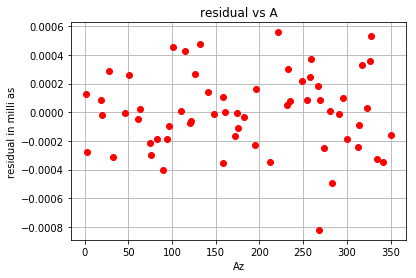

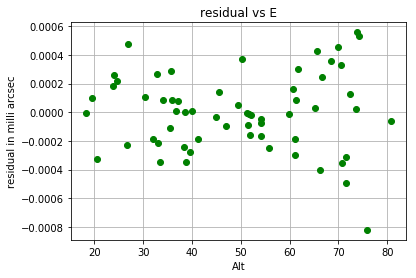

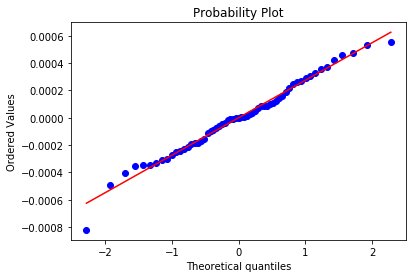

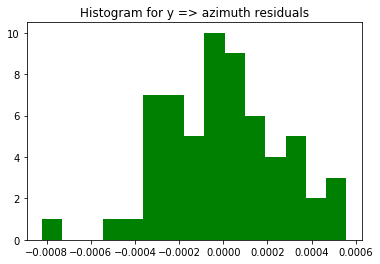

In [10]:
# Looks like higher order sine also present
X7 = np.sin(2.0*np.radians(list(df_com['obs_az'])))
X8 = np.sin(3.0*np.radians(list(df_com['obs_az'])))
X9 = np.sin(4.0*np.radians(list(df_com['obs_az'])))
X10 = np.cos(np.radians(29.361232))*np.sin(np.radians(list(df_com['obs_az']))) / np.cos(np.radians(list(df_com['obs_alt'])))
X = np.column_stack([X1, X2, X3, X4, X5, X6, X7, X8, X9, X10])
y_predicted_training = get_stats(X, y, df_com)

# residual plots at this stage
plt.plot(df_com.obs_az, (y-y_predicted_training), 'ro')
#plt.axis('equal')
plt.title('residual vs A')
plt.xlabel('Az')
plt.grid()
plt.ylabel('residual in milli as')
plt.show()

plt.plot(df_com.obs_alt, (y-y_predicted_training), 'go')
#plt.axis('equal')
plt.title('residual vs E')
plt.xlabel('Alt')
plt.ylabel('residual in milli arcsec')
plt.grid()
plt.show()

stats.probplot(y - y_predicted_training, dist='norm', plot=plt.figure().add_subplot(111))
#plt.axis('equal')
plt.show()

fig = plt.figure()
ax = fig.add_subplot(111)
dist_tuple = ax.hist((y - y_predicted_training), bins=15, color='green')
#ax.set_xlim([-10, 10])
#ax.set_ylim([0, 10])
ax.set_title('Histogram for y => azimuth residuals')
#ax.set_aspect('equal', adjustable='box')
plt.show()

0.623106770488 arc seconds is rough accuracy between cv and no cv


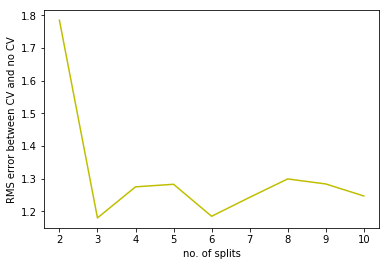

In [11]:
# Performing some CV
from sklearn.model_selection import KFold, cross_val_score, cross_val_predict
kfold = KFold(n_splits=5, shuffle=True)
ols = linear_model.LinearRegression()
cross_val_score(ols, X, y, cv=kfold, n_jobs=1)

y_pred = cross_val_predict(ols, X, y, cv=kfold)

y_diff = np.sqrt(np.sum(np.square(y_pred - y_predicted_training))/61)*3600
print(y_diff, "arc seconds is rough accuracy between cv and no cv")
all_y_pred = list()
for i in range(2,11):
    kfold = KFold(n_splits=i, shuffle=True)
    y_pred = cross_val_predict(ols, X, y, cv=kfold)
    diff = np.sqrt(np.sum(np.square(y_pred - y))/61)*3600
    all_y_pred.append(diff)

#plt.plot(np.arange(2,11,1), all_y_pred, 'yo')
#plt.show()
#all_y_pred
plt.plot([2,3,4,5,6,7,8,9,10], all_y_pred, 'y-')
plt.xlabel('no. of splits')
plt.ylabel('RMS error between CV and no CV')
plt.show()

In [12]:
np.arange(2,11,1)

array([ 2,  3,  4,  5,  6,  7,  8,  9, 10])

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:14: RuntimeWarning: divide by zero encountered in true_divide
  


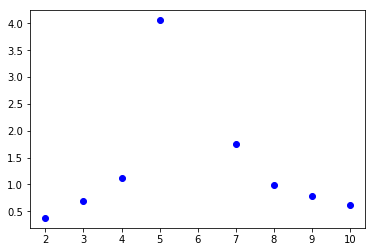

In [13]:
# manually doing validation
mean_rses = list()
for i in range(2,11):
    kfold = KFold(n_splits=i, shuffle=True)
    ols = linear_model.LinearRegression()
    scores = list()
    RSES = list()
    for train_indices, test_indices in kfold.split(X):
        y_fitted = ols.fit(X[train_indices], y[train_indices])
        y_predict = ols.predict(X[test_indices])
        n = len(test_indices)
        s = ols.score(X[train_indices], y[train_indices])
        scores.append(s)
        RSE = np.sqrt( np.sum( np.square( (y[test_indices] - y_predict)/(n-10-1) ) ) )
        RSES.append(RSE)
    #print(scores)
    #print(RSES)
    #print("mean RSE is ", np.mean(RSES)*3600)
    mean_rses.append(np.mean(RSES)*3600)
plt.plot(np.arange(2,11,1), mean_rses, 'bo')
plt.show()

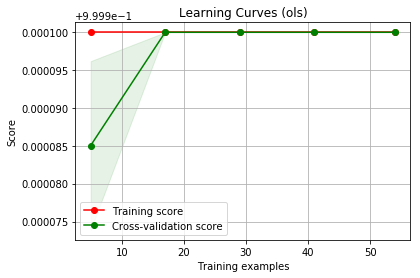

In [14]:
from sklearn.model_selection import learning_curve

def calc_mean_rse(kfold):
    RSES = list()
    for train_indices, test_indices in kfold.split(X):
        y_fitted = ols.fit(X[train_indices], y[train_indices])
        y_predict = ols.predict(X[test_indices])
        n = len(test_indices)
        #s = ols.score(X[train_indices], y[train_indices])
        #scores.append(s)
        RSE = np.sqrt( np.sum( np.square( (y[test_indices] - y_predict)/(n-10-1) ) ) )
        RSES.append(RSE)
    #print(scores)
    #print(RSES)
    #print("mean RSE is ", np.mean(RSES)*3600)
    return np.mean(RSES)*3600

def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=1, train_sizes=np.linspace(.1, 1.0, 5)):
    """
    Generate a simple plot of the test and training learning curve.

    Parameters
    ----------
    estimator : object type that implements the "fit" and "predict" methods
        An object of that type which is cloned for each validation.

    title : string
        Title for the chart.

    X : array-like, shape (n_samples, n_features)
        Training vector, where n_samples is the number of samples and
        n_features is the number of features.

    y : array-like, shape (n_samples) or (n_samples, n_features), optional
        Target relative to X for classification or regression;
        None for unsupervised learning.

    ylim : tuple, shape (ymin, ymax), optional
        Defines minimum and maximum yvalues plotted.

    cv : int, cross-validation generator or an iterable, optional
        Determines the cross-validation splitting strategy.
        Possible inputs for cv are:
          - None, to use the default 3-fold cross-validation,
          - integer, to specify the number of folds.
          - An object to be used as a cross-validation generator.
          - An iterable yielding train/test splits.

        For integer/None inputs, if ``y`` is binary or multiclass,
        :class:`StratifiedKFold` used. If the estimator is not a classifier
        or if ``y`` is neither binary nor multiclass, :class:`KFold` is used.

        Refer :ref:`User Guide <cross_validation>` for the various
        cross-validators that can be used here.

    n_jobs : integer, optional
        Number of jobs to run in parallel (default 1).
    """
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt



title = "Learning Curves (ols)"

cv = KFold(n_splits=10, shuffle=True)

estimator = linear_model.LinearRegression()
plot_learning_curve(estimator, title, X, y, cv=cv, n_jobs=4)

plt.show()

In [15]:
from sklearn.feature_selection import f_regression

f_regression(X, y)

(array([  1.67566624e+09,   4.42926512e-02,   5.76889061e-02,
          2.69150466e-02,   4.37206823e+01,   3.70535388e-01,
          1.00233220e+01,   1.56372531e+00,   2.50610073e+00,
          6.20176232e+01]),
 array([  1.38444587e-221,   8.34035228e-001,   8.11019304e-001,
          8.70246174e-001,   1.22248514e-008,   5.45049209e-001,
          2.44617851e-003,   2.16057367e-001,   1.18752454e-001,
          8.90030782e-011]))

In [16]:
# train model for altitude now
lat = np.radians(29.3612)
W1 = np.array(df_com.obs_alt)
W2 = -1.0*np.sin(np.radians(list(df_com['obs_az'])))
W3 = np.cos(np.radians(list(df_com['obs_az'])))
# Adding tube flexure
W4 = np.cos(np.radians(list(df_com['obs_alt'])))
#W4 = (np.cos(lat)*np.cos(np.radians(list(df_com['obs_az'])))*np.sin(np.radians(list(df_com['obs_alt']))) - np.sin(lat)*np.cos(np.radians(list(df_com['obs_alt']))))
# Adding harmonics
#W5 = np.sin(2.0*np.radians(list(df['obs_alt'])))
#W6 = np.sin(2.0*np.radians(list(df['obs_az'])))
W = np.column_stack([W1, W2, W3, W4])

z = np.array(df_com.catalogue_alt)
regr2 = linear_model.LinearRegression()
regr2.fit(W, z)
z_predicted_training = regr2.predict(W)
regr2.intercept_ * 3600

Z_p = get_stats(W, z, df_com, axis=1)

RSE is : 0.000447330786282
R2 score is : 0.999999999361
Adjusted R2 score is : 0.999999999315
F-statistic is : 21894224355.2
vertical rms error in arcsec  1.54298031356
coefficients are  [ 3601.25719572   -25.7806186     48.94175235   112.72962814]


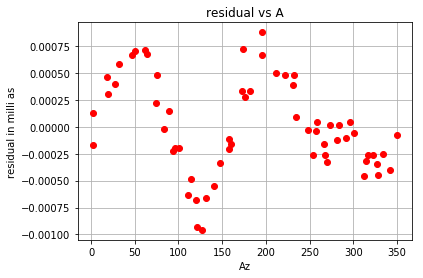

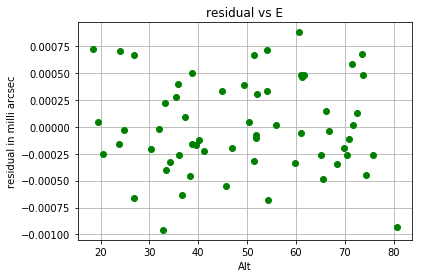

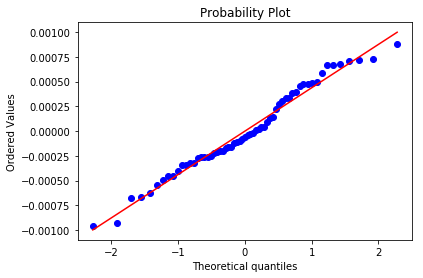

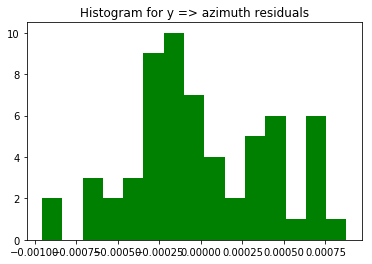

In [17]:
# residual plots at this stage
plt.plot(df_com.obs_az, (z-z_predicted_training), 'ro')
#plt.axis('equal')
plt.title('residual vs A')
plt.xlabel('Az')
plt.grid()
plt.ylabel('residual in milli as')
plt.show()

plt.plot(df_com.obs_alt, (z-z_predicted_training), 'go')
#plt.axis('equal')
plt.title('residual vs E')
plt.xlabel('Alt')
plt.ylabel('residual in milli arcsec')
plt.grid()
plt.show()

stats.probplot(z - z_predicted_training, dist='norm', plot=plt.figure().add_subplot(111))
#plt.axis('equal')
plt.show()

fig = plt.figure()
ax = fig.add_subplot(111)
dist_tuple = ax.hist((z - z_predicted_training), bins=15, color='green')
#ax.set_xlim([-10, 10])
#ax.set_ylim([0, 10])
ax.set_title('Histogram for y => azimuth residuals')
#ax.set_aspect('equal', adjustable='box')
plt.show()

intercept is  -12.1344478164
RSE is : 8.64821970345e-05
R2 score is : 0.999999999978
Adjusted R2 score is : 0.999999999974
F-statistic is : 260346170929.0
vertical rms error in arcsec  0.28467503677
coefficients are  [  3.60073527e+03  -2.58563737e+01   4.86895122e+01   4.41371418e+01
   2.02227997e-01   1.85226859e+00  -8.95274007e-01   4.93679614e-01
  -4.53404530e-05]


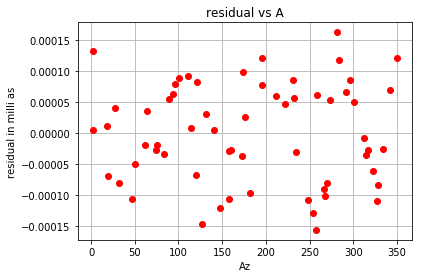

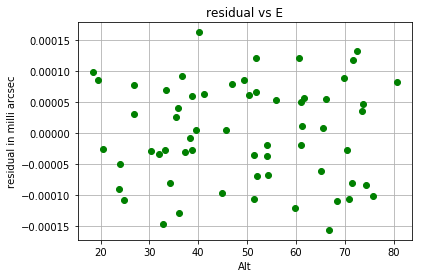

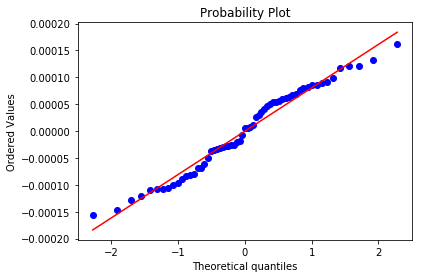

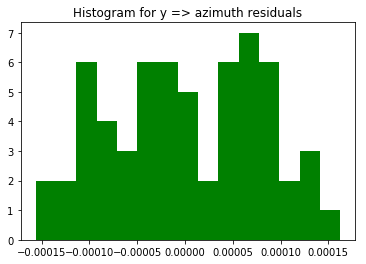

In [18]:
#W9 = np.cos(2.0 * np.radians(list(df_com['obs_alt'])))
#W9 = np.cos(2.0 * np.radians(list(df_com['obs_alt'])))
W9 = np.power(df_com['obs_alt'], 3)
W5 = np.cos(np.radians(list(df_com['obs_az'])))*np.sin(np.radians(list(df_com['obs_alt'])))
W6 = np.sin(np.radians(list(2.0*df_com['obs_az'])))
W7 = np.cos(np.radians(list(3.0*df_com['obs_az'])))
#W10 = np.sin(np.radians(list(3.0*df_com['obs_az'])))
W8 = np.cos(np.radians(list(2.0*df_com['obs_az'])))
W = np.column_stack([W1, W2, W3, W4, W5, W6, W7, W8, W9])

z = np.array(df_com.catalogue_alt)
regr2 = linear_model.LinearRegression()
regr2.fit(W, z)
z_predicted_training = regr2.predict(W)
print('intercept is ', regr2.intercept_ * 3600)

Z_p = get_stats(W, z, df_com, axis=1)

# residual plots at this stage
plt.plot(df_com.obs_az, (z-z_predicted_training), 'ro')
#plt.axis('equal')
plt.title('residual vs A')
plt.xlabel('Az')
plt.grid()
plt.ylabel('residual in milli as')
plt.show()

plt.plot(df_com.obs_alt, (z-z_predicted_training), 'go')
#plt.axis('equal')
plt.title('residual vs E')
plt.xlabel('Alt')
plt.ylabel('residual in milli arcsec')
plt.grid()
plt.show()

stats.probplot(z - z_predicted_training, dist='norm', plot=plt.figure().add_subplot(111))
#plt.axis('equal')
plt.show()

fig = plt.figure()
ax = fig.add_subplot(111)
dist_tuple = ax.hist((z - z_predicted_training), bins=15, color='green')
#ax.set_xlim([-10, 10])
#ax.set_ylim([0, 10])
ax.set_title('Histogram for y => azimuth residuals')
#ax.set_aspect('equal', adjustable='box')
plt.show()

In [19]:
# calculate studentized residuals here

In [20]:
def estimate_test_error(X, y, folds=5):
    RSES = list()
    ols = linear_model.LinearRegression()
    kfold = KFold(n_splits=folds, shuffle=True)
    for train_indices, test_indices in kfold.split(X):
        ols.fit(X[train_indices], y[train_indices])
        y_predict = ols.predict(X[test_indices])
        n = len(test_indices)
        p = X.shape[1]
        #s = ols.score(X[train_indices], y[train_indices])
        #scores.append(s)
        RSE = np.sqrt( np.sum( np.square( (y[test_indices] - y_predict)/(n-p-1) ) ) )
        RSES.append(RSE)
    print("mean RSE after validation is ", np.mean(RSES)*3600, ' arcseconds')
    
estimate_test_error(W, z)



mean RSE after validation is  0.575470902506  arcseconds


In [21]:
from sklearn.model_selection import train_test_split
def plot_learning_curve(title, X, y, ylim=None, train_sizes=[15,20,25,30,35,40,47]):

    RSES_per_fold_train = list() # contains errors for one fold (0.1, 0.3, 0.5 ...)
    RSES_per_fold_test = list()
    arr1 = list() # list of all folds (error for each no. of points will be averaged over all folds)
    # i.e. avg of all 0.1, avg of all 0.3, avg of all 0.5 ...
    arr2 = list()
    ols = linear_model.LinearRegression()
    kfold = KFold(n_splits=5, shuffle=True)
    for train_indices, test_indices in kfold.split(X):
        for train_size in train_sizes:
            #print(train_size)
            X_train, X_test, y_train, y_test = train_test_split(X[train_indices], y[train_indices], train_size=train_size, random_state=42)
            ols.fit(X_train, y_train)
            y_predict_train = ols.predict(X_train)
            y_predict_test = ols.predict(X_test)
            #print(X_train.shape)
            n = X_train.shape[0]
            p = X_train.shape[1]
            RSE_train = np.sqrt( np.sum( np.square( (y_train - y_predict_train)/(n-p) ) ) )
            #print(RSE)
            #if train_size == 10:
                #print("for 10 samples error is", RSE*3600)
            RSES_per_fold_train.append(RSE_train*3600)
            
            RSE_test = np.sqrt( np.sum( np.square( (y_test - y_predict_test)/(n-p) ) ) )
            RSES_per_fold_test.append(RSE_test*3600)

        arr1.append(RSES_per_fold_train)
        arr2.append(RSES_per_fold_test)
    train_cv_errors = [np.mean([err[i] for err in arr1]) for i in range(0,len(train_sizes))]
    #print(arr)
    #print(train_cv_errors)
    test_cv_errors = [np.mean([err[i] for err in arr2]) for i in range(0,len(train_sizes))]
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Mean RSE")
        
    RSE_train_mean = np.mean(train_cv_errors)
    RSE_train_std = np.std(train_cv_errors)
    RSE_test_mean = np.mean(test_cv_errors)
    RSE_test_std = np.std(test_cv_errors)
    plt.grid()
    print(len(train_cv_errors))
    plt.fill_between(train_sizes, RSE_train_mean - RSE_train_std,RSE_train_mean + RSE_train_std, alpha=0.1, color="r")
    plt.fill_between(train_sizes, RSE_test_mean - RSE_test_std,RSE_test_mean + RSE_test_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_cv_errors, 'o-', color="r",label="Training error")
    plt.plot(train_sizes, test_cv_errors, 'o-', color="g",label="CV error")

    plt.legend(loc="best")
    return plt

7


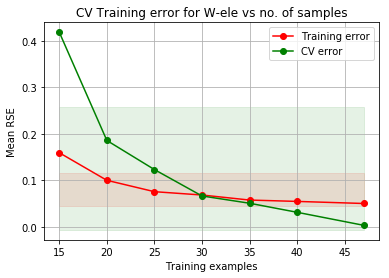

In [22]:
title = "CV Training error for W-ele vs no. of samples"
plot_learning_curve(title, W, z)
plt.show()

7


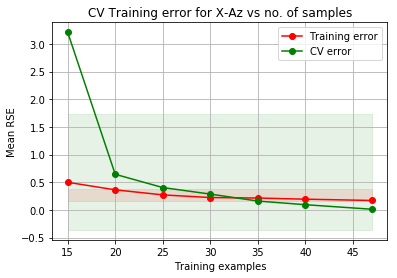

In [23]:
title = "CV Training error for X-Az vs no. of samples"
plot_learning_curve(title, X, y)
plt.show()

In [24]:
# BEHAVIOUR IS NOT PREDICTABLE WITH LESS NO. OF VALUES I.E. BEFORE 20.

7


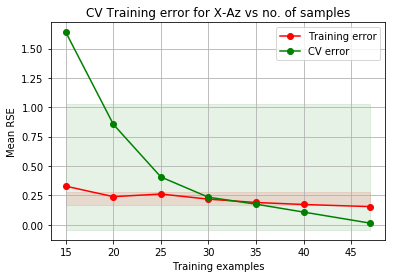

In [25]:
title = "CV Training error for X-Az vs no. of samples"
plot_learning_curve(title, X, y)
plt.show()

In [26]:
# SEE WHAT I MEANT. AT 25 ALWAYS <1 BUT BEFORE THAT UNPREDICTABLE.

In [27]:
def plot_horiz_vert(X, y, W, z, dataframe):
    ols1 = linear_model.LinearRegression()
    ols2 = linear_model.LinearRegression()
    ols1.fit(X, y)
    ols2.fit(W, z)
    yp = ols1.predict(X)
    zp = ols2.predict(W)
    
    h = (y - yp)*np.cos(np.radians(dataframe.obs_alt))
    v = (z - zp)
    h_ms_train = np.mean(np.square(h))
    h_rms_train = np.sqrt(h_ms_train)
    print("horizontal rms error in arcsec ", h_rms_train*3600)
    v_ms_train = np.mean(np.square(v))
    v_rms_train = np.sqrt(v_ms_train)
    print("vertical rms error in arcsec ", v_rms_train*3600)
    print("net RMS error", np.sqrt(h_ms_train + v_ms_train)*3600)
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.set_xlim(left=-0.6)
    #ax.set_ylim(bottom=0.0)
    ax.scatter(h*3600, v*3600)

    # circles of 4 arc sec accuracy and 10 arc sec accuracy
    circ1 = plt.Circle((0.0, 0.0), radius=1.2, color='g', fill=False)
    circ2 = plt.Circle((0.0, 0.0), radius=0.6, color='g', fill=False)
    ax.set_title('TRAINING PERFORMANCE')
    ax.set_aspect('equal', adjustable='box')
    ax.set_xlim([-2, 2])
    ax.set_ylim([-2, 2])
    ax.set_xlabel('horizontal in arcsec')
    ax.set_ylabel('vertical in arcsec')
    ax.text(0.65, 1.0, '1.2', color='green', fontsize=13)
    ax.text(0.3, 0.5, '0.6', color='green', fontsize=13)
    ax.add_artist(circ1)
    ax.add_artist(circ2)
    plt.show()

horizontal rms error in arcsec  0.531026725061
vertical rms error in arcsec  0.28467503677
net RMS error 0.602519094543


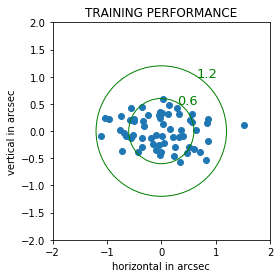

In [28]:
plot_horiz_vert(X, y, W, z, df_com)

In [29]:
df_com.corr()

,catalogue_az,catalogue_alt,obs_az,obs_alt,alt_diff,az_diff
catalogue_az,1.000000,-0.042931,1.000000,-0.042685,0.413860,0.566088
catalogue_alt,-0.042931,1.000000,-0.042869,1.000000,-0.060730,0.247735
obs_az,1.000000,-0.042869,1.000000,-0.042623,0.413813,0.566243
obs_alt,-0.042685,1.000000,-0.042623,1.000000,-0.060134,0.247761
alt_diff,0.413860,-0.060730,0.413813,-0.060134,1.000000,0.027883
az_diff,0.566088,0.247735,0.566243,0.247761,0.027883,1.000000


In [30]:
d = pd.DataFrame(X)
d.corr()

,0,1,2,3,4,5,6,7,8,9
0,1.000000,0.027349,0.031210,0.021474,-0.652519,-0.078991,-0.381034,-0.160659,-0.201846,-0.715975
1,0.027349,1.000000,0.996439,0.007332,-0.130335,0.068268,0.086298,0.059415,-0.087658,-0.122193
2,0.031210,0.996439,1.000000,-0.010121,-0.115407,0.067758,0.079405,0.064933,-0.090266,-0.110263
3,0.021474,0.007332,-0.010121,1.000000,-0.205555,0.085862,-0.011068,-0.107416,-0.019733,-0.191592
4,-0.652519,-0.130335,-0.115407,-0.205555,1.000000,0.000415,-0.005865,-0.078963,0.098898,0.987256
5,-0.078991,0.068268,0.067758,0.085862,0.000415,1.000000,-0.058538,-0.007196,-0.075701,0.014442
6,-0.381034,0.086298,0.079405,-0.011068,-0.005865,-0.058538,1.000000,0.069674,-0.071101,-0.010159
7,-0.160659,0.059415,0.064933,-0.107416,-0.078963,-0.007196,0.069674,1.000000,0.033407,-0.094838
8,-0.201846,-0.087658,-0.090266,-0.019733,0.098898,-0.075701,-0.071101,0.033407,1.000000,0.095565
9,-0.715975,-0.122193,-0.110263,-0.191592,0.987256,0.014442,-0.010159,-0.094838,0.095565,1.000000


In [31]:
def show_b_variance(X, y, W, z):
    ols1 = linear_model.LinearRegression()
    ols2 = linear_model.LinearRegression()
    ols1.fit(X, y)
    ols2.fit(W, z)
    yp = ols1.predict(X)
    zp = ols2.predict(W)
    def calc_var(X, y, yp):
        X_copy = X
        X_copy = np.insert(X_copy, 0, 1.0, axis=1)
        X_t = X_copy.T
        XtX_inv = np.linalg.inv(np.dot(X_t, X_copy))
        #print(XXt_inv.shape)
        H = np.dot(X_copy, np.dot(XtX_inv, X_t))
        MSE_y_train = (np.sum(np.square(y - yp)) / (41 - 4 - 1) )
        #var_res_y_train = (MSE_y_train)*(np.eye(41,41) - H)
        var_b = MSE_y_train * (XtX_inv)
        variance = np.diagonal(var_b, axis1=0, axis2=1)
        return variance
        #print(var_res_y_train)
        #print("Variance of coefficients :")
    var_az = calc_var(X, y, yp)
    var_ele = calc_var(W, z, zp)
    print("SE of coefficients for azimuth:")
    print(np.sqrt(var_az)*3600)
    print("SE of coefficients for alt:")
    print(np.sqrt(var_ele)*3600)
show_b_variance(X, y, W, z)

SE of coefficients for azimuth:
[ 1.46617057  0.00470555  2.10568578  1.82221403  0.14554308  1.03283884
  0.23172323  0.36494987  0.28174851  0.26320054  1.23925976]
SE of coefficients for alt:
[  9.42732225e+00   6.61827991e-02   6.51645541e-02   2.79812350e-01
   8.47691727e+00   3.76542989e-01   6.97719561e-02   7.09789739e-02
   6.77299126e-02   5.73613115e-06]


In [32]:
y1 = df_com.az_diff * np.cos(np.radians(list(df_com['obs_alt'])))
y2 = df_com.alt_diff
Y = np.append(y1, y2, axis=0)

x1 = np.zeros(df_com.shape[0])
x2 = np.ones(df_com.shape[0])
x3 = -1.0/np.cos(np.radians(list(df_com['obs_alt'])))
x4 = np.tan(np.radians(list(df_com['obs_alt'])))
x5 = np.cos(np.radians(list(df_com['obs_az']))) * np.tan(np.radians(list(df_com['obs_alt'])))
x6 = np.sin(np.radians(list(df_com['obs_az']))) * np.tan(np.radians(list(df_com['obs_alt'])))
x7 = np.zeros(df_com.shape[0])
#x8 = np.sin(3.0*np.radians(list(df_com['obs_az'])))
x8 = np.zeros(df_com.shape[0])
x9 = np.zeros(df_com.shape[0])
x10 = np.zeros(df_com.shape[0])
x11 = np.zeros(df_com.shape[0])
x12 = np.zeros(df_com.shape[0])
x13 = np.zeros(df_com.shape[0])
#x14 = np.zeros(df_com.shape[0])
x15 = np.cos(2.0*np.radians(list(df_com['obs_az'])))
x16 = np.sin(2.0*np.radians(list(df_com['obs_az'])))
x17 = np.zeros(df_com.shape[0])
x18 = np.sin(4.0*np.radians(list(df_com['obs_az'])))
x19 = np.sin(3.0*np.radians(list(df_com['obs_az'])))
x20 = np.zeros(df_com.shape[0])

X1 = np.column_stack([x1, x2, x3, x4, x5, x6, x7, x8, x9, x10, x11, x12, x13, x15, x16, x17, x18, x19, x20])
X1 = X1 * np.cos(np.radians(list(df_com['obs_alt']))[:, np.newaxis])

x1 = np.ones(df_com.shape[0])
x2 = np.zeros(df_com.shape[0])
x3 = np.zeros(df_com.shape[0])
x4 = np.zeros(df_com.shape[0])
x5 = np.cos(np.radians(list(df_com['obs_alt'])))
x6 = -1.0*np.sin(np.radians(list(df_com['obs_alt'])))
x7 = -1.0/np.tan(np.radians(list(df_com['obs_alt'])))
#x8 = np.zeros(df_com.shape[0])
x8 = np.sin(0.5*np.radians(list(df_com['obs_az'])))
x9 = np.cos(np.radians(list(df_com['obs_az'])))
x10 = np.sin(np.radians(list(df_com['obs_az'])))
x11 = np.power(np.radians(list(df_com['obs_alt'])), 2)
x12 = np.sin(4.0 *np.radians(list(df_com['obs_alt'])))
x13 = np.sin(2.0 *np.radians(list(df_com['obs_az'])))
#x14 = np.cos(2.0 *np.radians(list(df_com['obs_az'])))
x15 = np.zeros(df_com.shape[0])
x16 = np.zeros(df_com.shape[0])
x17 = np.cos(3.0 *np.radians(list(df_com['obs_az'])))
x18 = np.zeros(df_com.shape[0])
x19 = np.zeros(df_com.shape[0])
x20 = np.sin(6.0 *np.radians(list(df_com['obs_alt'])))
#x20 = np.zeros(df_com.shape[0])
#x21 = np.zeros(df_com.shape[0])
#x9 = np.sin(2.0*np.radians(list(df_com['obs_alt'])))

X2 = np.column_stack([x1, x2, x3, x4, x5, x6, x7, x8, x9, x10, x11, x12, x13, x15, x16, x17, x18, x19, x20])

X = np.append(X1, X2, axis=0)

#XTXinv = np.linalg.inv(np.dot(X.T, X))
#H = np.dot(XTXinv, X.T)
#b = np.dot(H, Y)
#print(b*3600)
ols = linear_model.LinearRegression(fit_intercept=False)
ols.fit(X, Y)
Y_pred = ols.predict(X)
print(ols.coef_*3600)
#get_stats(X, Y, df_com)
e = Y - Y_pred
n = int(X.shape[0]/2)
p = X.shape[1]
#e*3600

[ -1.25441721e+02   2.89991522e+03  -4.78622029e+01  -2.13386621e+01
   2.60188972e+01  -4.86162027e+01  -9.87045036e+00   6.26048388e+00
  -4.61917392e+01  -2.58460351e+01   1.96369863e+01   6.02195520e+00
  -1.82925021e+00  -1.85196556e+00  -3.02100609e+00   1.13920070e+00
  -1.04702877e+00   7.85521997e-01   1.36326881e+00]


In [33]:
def stats(X, Y, Y_pred):
        n = X.shape[0]/2
        p = X.shape[1]
        e = Y - Y_pred
        RSS = np.dot(e.T, e)
        residual_err = np.sqrt(RSS/n) * 3600
        MSE = np.sqrt(RSS/(2*n - p)) * 3600

        print("MSE is ", MSE, " arcsec")
        print("Residual error is ", residual_err)
        b_var = np.square(MSE) * np.linalg.inv(np.dot(X.T,X))
        print(np.diagonal(b_var, axis1=0, axis2=1))
    
stats(X, Y, Y_pred)

MSE is  0.412519210565  arcsec
Residual error is  0.536040832275
[ 1.38731786  0.80351429  1.68937511  1.07106914  0.0115954   0.0091853
  0.20475248  0.72517172  0.13536878  0.00526358  0.47068036  0.05314747
  0.00605621  0.01207143  0.01465292  0.00676633  0.01393114  0.01342984
  0.04704468]


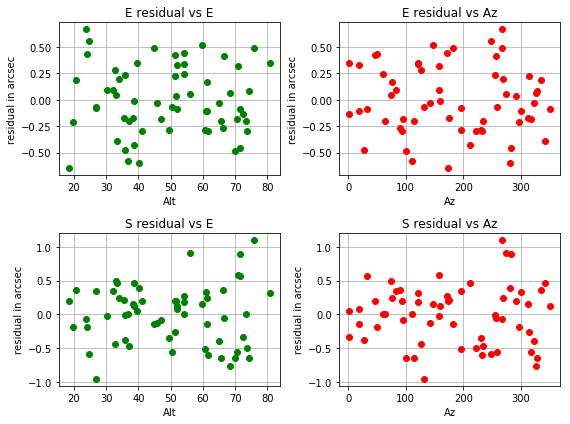

In [40]:
fig = plt.gcf()
fig.set_size_inches(8, 6)
plt.subplot(221)
plt.tight_layout()
plt.plot(df_com.obs_alt, e[n:]*3600, 'go')
#plt.axis('equal')
plt.title('E residual vs E')
plt.xlabel('Alt')
plt.ylabel('residual in arcsec')
plt.grid()
#plt.show()

plt.subplot(222)
plt.tight_layout()
plt.plot(df_com.obs_az, e[n:]*3600, 'ro')
#plt.axis('equal')
plt.title('E residual vs Az')
plt.xlabel('Az')
plt.ylabel('residual in arcsec')
plt.grid()
#plt.show()

plt.subplot(223)
plt.tight_layout()
plt.plot(df_com.obs_alt, e[:n]*3600, 'go')
#plt.axis('equal') 
plt.title('S residual vs E')
plt.xlabel('Alt')
plt.ylabel('residual in arcsec')
plt.grid()
#plt.show()

plt.subplot(224)
plt.tight_layout()
plt.plot(df_com.obs_az, e[:n]*3600, 'ro')
#plt.axis('equal') 
plt.title('S residual vs Az')
plt.xlabel('Az')
plt.ylabel('residual in arcsec')
plt.grid()
plt.show()


horizontal rms error in arcsec  0.431034878326
vertical rms error in arcsec  0.318667079461
net RMS error 0.536040832275


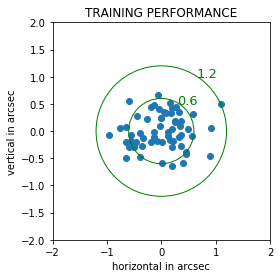

In [44]:
def plot_circles(e):
    n = int(e.shape[0]/2)
    h = e[:n]
    v = e[n:]
    h_ms_train = np.mean(np.square(h))
    h_rms_train = np.sqrt(h_ms_train)
    print("horizontal rms error in arcsec ", h_rms_train*3600)
    v_ms_train = np.mean(np.square(v))
    v_rms_train = np.sqrt(v_ms_train)
    print("vertical rms error in arcsec ", v_rms_train*3600)
    print("net RMS error", np.sqrt(h_ms_train + v_ms_train)*3600)
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.set_xlim(left=-0.6)
    #ax.set_ylim(bottom=0.0)
    ax.scatter(h*3600, v*3600)

    # circles of 4 arc sec accuracy and 10 arc sec accuracy
    circ1 = plt.Circle((0.0, 0.0), radius=1.2, color='g', fill=False)
    circ2 = plt.Circle((0.0, 0.0), radius=0.6, color='g', fill=False)
    ax.set_title('TRAINING PERFORMANCE')
    ax.set_aspect('equal', adjustable='box')
    ax.set_xlim([-2, 2])
    ax.set_ylim([-2, 2])
    ax.set_xlabel('horizontal in arcsec')
    ax.set_ylabel('vertical in arcsec')
    ax.text(0.65, 1.0, '1.2', color='green', fontsize=13)
    ax.text(0.3, 0.5, '0.6', color='green', fontsize=13)
    ax.add_artist(circ1)
    ax.add_artist(circ2)
    plt.show()
plot_circles(e)

In [73]:
def cross_validate(X, y, folds=10):
    RSES = list()
    n = int(X.shape[0]/2)
    X1 = X[:n, :]
    X2 = X[n:, :]
    
    y1 = y[:n]
    y2 = y[n:]
    
    ols = linear_model.LinearRegression()
    kfold = KFold(n_splits=folds, shuffle=True)
    
    for train_indices, test_indices in kfold.split(X1):
        X_train = np.append(X1[train_indices], X2[train_indices], axis=0)
        X_test = np.append(X1[test_indices], X2[test_indices], axis=0)
        
        y_train = np.append(y1[train_indices], y2[train_indices], axis=0)
        y_test = np.append(y1[test_indices], y2[test_indices], axis=0)
        
        ols.fit(X_train, y_train)
        y_predict = ols.predict(X_test)
        n = len(test_indices)
        p = X.shape[1]
        #s = ols.score(X[train_indices], y[train_indices])
        #scores.append(s)
        e = y_test - y_predict
        RSS = np.dot(e.T, e)
        RSE = np.sqrt( RSS/(n))
        RSES.append(RSE)
    print("mean all sky error after validation is ", np.mean(RSES)*3600, ' arcseconds')
    
cross_validate(X, Y)   

mean all sky error after validation is  0.639702810406  arcseconds


In [100]:
from sklearn.model_selection import ShuffleSplit
def plot_learning_curve_new(title, X, y, ylim=None, train_sizes=[15,20,25,30,35,40,47]):
    
    n = int(X.shape[0]/2)
    X1 = X[:n, :]
    X2 = X[n:, :]
    
    y1 = y[:n]
    y2 = y[n:]
    
    RSES_per_fold_train = list() # contains errors for one fold (0.1, 0.3, 0.5 ...)
    RSES_per_fold_test = list()
    arr1 = list() # list of all folds (error for each no. of points will be averaged over all folds)
    # i.e. avg of all 0.1, avg of all 0.3, avg of all 0.5 ...
    arr2 = list()
    
    ols = linear_model.LinearRegression()
    kfold = KFold(n_splits=5, shuffle=True)
    for train_indices, test_indices in kfold.split(X1):
        
        
        for train_size in train_sizes:
            #print(train_size)
            ss = ShuffleSplit(n_splits=1, random_state=42, train_size=train_size, test_size=None)
            traini, testi = next(ss.split(X1[train_indices]))
            
            X_train = np.append(X1[traini], X2[traini], axis=0)
            X_test = np.append(X1[testi], X2[testi], axis=0)
        
            Y_train = np.append(y1[traini], y2[traini], axis=0)
            Y_test = np.append(y1[testi], y2[testi], axis=0)
            
            ols.fit(X_train, Y_train)
            y_predict_train = ols.predict(X_train)
            y_predict_test = ols.predict(X_test)
            #print(X_train.shape)
            etrain = y_predict_train - Y_train
            etest = y_predict_test - Y_test

            n_train = int(X_train.shape[0]/2)
            n_test = int(X_test.shape[0]/2)
            p = X_train.shape[1]
            
            RSE_train = np.sqrt( np.dot(etrain.T, etrain)/(n_train) )
            #print(RSE)ytrain
            #if train_size == 10:
                #print("for 10 samples error is", RSE*3600)
            RSES_per_fold_train.append(RSE_train*3600)
            
            RSE_test = np.sqrt( np.dot(etest.T, etest)/(n_test) )
            RSES_per_fold_test.append(RSE_test*3600)

        arr1.append(RSES_per_fold_train)
        arr2.append(RSES_per_fold_test)
    train_cv_errors = [np.mean([err[i] for err in arr1]) for i in range(0,len(train_sizes))]
    #print(arr)
    #print(train_cv_errors)
    test_cv_errors = [np.mean([err[i] for err in arr2]) for i in range(0,len(train_sizes))]
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Mean RSE")
        
    RSE_train_mean = np.mean(train_cv_errors)
    RSE_train_std = np.std(train_cv_errors)
    RSE_test_mean = np.mean(test_cv_errors)
    RSE_test_std = np.std(test_cv_errors)
    plt.grid()
    print(len(train_cv_errors))
    plt.fill_between(train_sizes, RSE_train_mean - RSE_train_std,RSE_train_mean + RSE_train_std, alpha=0.1, color="r")
    plt.fill_between(train_sizes, RSE_test_mean - RSE_test_std,RSE_test_mean + RSE_test_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_cv_errors, 'o-', color="r",label="Training error")
    plt.plot(train_sizes, test_cv_errors, 'o-', color="g",label="CV error")

    plt.legend(loc="best")
    return plt

7


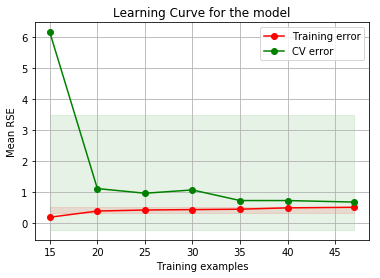

In [105]:
plot_learning_curve_new('Learning Curve for the model', X, Y)
plt.show()

In [104]:
y.shape

(61,)